In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('processed_data_final.xlsx')

In [3]:
data

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,Age_Senior-level,YearsAtCompany_Apprentice,YearsAtCompany_Expert,YearsAtCompany_Journeyman,YearsAtCompany_Master,Avg Time Spent(Mins)_0,Avg Time Spent(Mins)_1,Avg Time Spent(Mins)_2,Avg Time Spent(Mins)_3,Avg Time Spent(Mins)_4
0,0,2,2,-0.39,2,1,1,0,1,0,...,True,False,False,False,True,False,False,False,True,False
1,1,1,1,0.10,1,1,2,0,1,6,...,False,True,False,False,False,False,True,False,False,False
2,0,1,1,0.96,4,4,3,1,4,7,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,-0.89,5,1,4,1,3,1,...,False,False,False,True,False,False,False,False,True,False
4,0,2,1,0.10,1,3,5,1,1,7,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,0,2,2,-0.64,3,4,4405,0,2,1,...,False,False,False,True,False,True,False,False,False,False
4296,0,2,1,-0.52,4,3,4406,0,1,6,...,False,True,False,False,False,True,False,False,False,False
4297,0,2,1,-0.89,4,3,4407,1,1,2,...,False,True,False,False,False,False,True,False,False,False
4298,0,2,1,1.95,2,1,4408,1,2,7,...,False,True,False,False,False,False,True,False,False,False


In [5]:
X = data.drop(columns=['Attrition'])
y = data['Attrition']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.naive_bayes import GaussianNB

In [11]:
# Input
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [12]:
# Output
GaussianNB()

GaussianNB()

In [13]:
# Accuracy
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.837984496124031


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [15]:
# Predict the labels for the test set
y_pred = nb.predict(X_test)

In [16]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

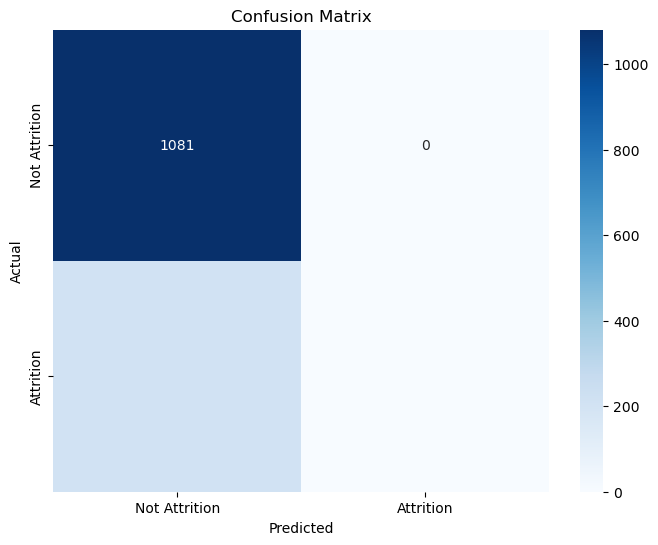

In [17]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Attrition', 'Attrition'], 
            yticklabels=['Not Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [19]:
# Get the predicted probabilities for the positive class
y_prob = nb.predict_proba(X_test)[:, 1]

In [20]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

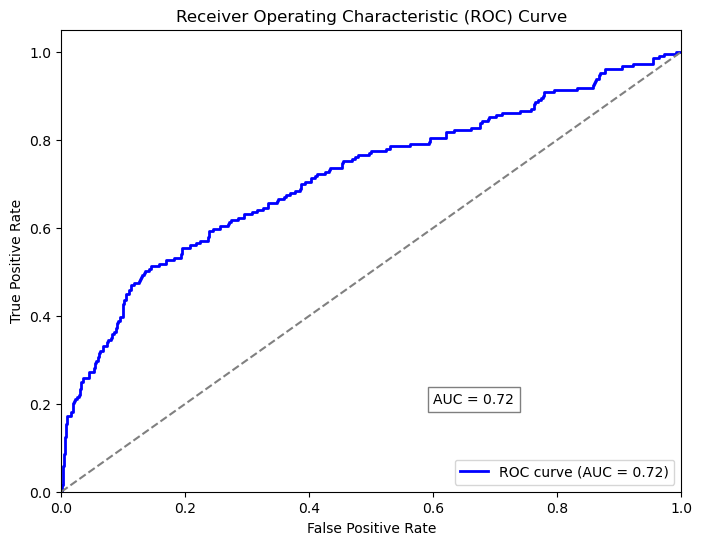

In [21]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [24]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)

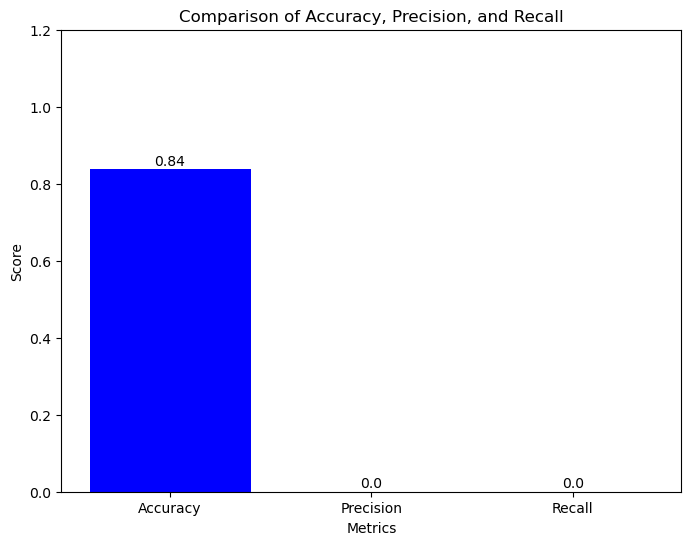

In [25]:
# Plot bar chart
plt.figure(figsize=(8, 6))
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]
plt.bar(metrics, values, color=['blue', 'green', 'red'])

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Accuracy, Precision, and Recall')
plt.ylim(0, 1.2)
plt.show()